In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
plt.rcParams['figure.figsize'] = (11.0, 9.0)
%matplotlib inline

In [3]:
train = pd.read_csv('training.csv', low_memory=False)
test = pd.read_csv('predict.csv', low_memory=False)

In [26]:
for dataset in [train, test]:
    dataset.drop(["id", "owner_id", "poster_id", "participant1_id", "participant2_id", 
                  "participant3_id", "participant4_id", "participant5_id", "poster_order", 
                  "poster_is_lead", "participant1_is_lead", "participant1_order",
                  "participant2_is_lead", "participant2_order", "participant3_is_lead", 
                  "participant3_order", "participant4_is_lead", "participant4_order",
                  "participant5_is_lead", "participant5_order"], axis=1, inplace=True)

### Creating new features from posted_time

In [4]:
# complete date with hours
train['post'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms'))

In [22]:
test['post'] = test['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms'))

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,post
0,273721,1.575530e+12,1.575530e+12,1.686167e+09,1.686167e+09,other,57727,space,0.99973,13,...,7,commented,male,1,0,1,marketing,1,0.99886,2019-12-05 07:13:20
1,273985,1.575580e+12,1.575580e+12,1.634145e+09,1.634145e+09,other,3201,space,0.99992,4,...,22636,viewed,male,0,0,1,other,1,0.23077,2019-12-05 21:06:40
2,273750,1.575540e+12,1.575540e+12,1.681664e+09,1.681664e+09,other,57727,space,0.99973,2,...,7,commented,male,1,0,1,marketing,1,0.99886,2019-12-05 10:00:00
3,273302,1.575370e+12,1.575370e+12,1.852591e+09,1.852591e+09,other,126877,space,0.50000,0,...,44661,viewed,male,0,0,1,other,1,0.23077,2019-12-03 10:46:40
4,273897,1.575560e+12,1.575560e+12,1.661083e+09,1.661083e+09,other,57727,space,0.99973,4,...,4,commented,male,1,0,1,marketing,1,0.99867,2019-12-05 15:33:20


In [23]:
test['post'].describe()

count                     100
unique                     47
top       2019-12-02 15:20:00
freq                        9
first     2014-08-27 14:33:20
last      2019-12-05 21:06:40
Name: post, dtype: object

In [6]:
# splitting date and hour
train['post_date'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').date())
train['hour_of_day'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').time())

In [27]:
test['post_date'] = test['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').date())
test['hour_of_day'] = test['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').time())

In [7]:
# day of a week - Monday == 1 to Sunday == 7
train['day_of_week'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').isoweekday())

In [28]:
test['day_of_week'] = test['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').isoweekday())

In [29]:
# sorting by dates
train.sort_values(by='post_date', inplace=True)
train.set_index('post_date', drop=False, inplace=True)

start = pd.to_datetime('2017-12-23').date()
end = pd.to_datetime('2019-11-06').date()

# taking just two-year period 
df = train.loc[start : end]

In [30]:
# dividing into numerical and categorical 
cat = df.select_dtypes(include=['object'])
num = df.select_dtypes(exclude=['object', 'datetime'])

In [31]:
df.tail()

,posted_time,updated_time,age,updated_age,app_type,owner_type,owner_influence,number_of_likes,number_of_comments,reactivity,...,participant5_gender,participant5_is_employee,participant5_is_in_connections,participant5_focus,participant5_influence,rank,post,post_date,hour_of_day,day_of_week
post_date,,,,,,,,,,,,,,,,,,,,,
2019-11-06,1.573040e+12,1.573040e+12,4.166351e+09,4.166351e+09,other,space,0.50000,0,0,0.0,...,male,0,1,marketing,0.23077,0.49912,2019-11-06 11:33:20,2019-11-06,11:33:20,3
2019-11-06,1.573030e+12,1.573030e+12,4.174526e+09,4.174526e+09,other,space,0.99992,0,0,0.0,...,male,0,1,marketing,0.23077,0.61414,2019-11-06 08:46:40,2019-11-06,08:46:40,3
2019-11-06,1.573030e+12,1.573030e+12,4.176178e+09,4.176178e+09,other,user,0.99937,4,0,1.0,...,male,0,1,other,0.23077,0.83005,2019-11-06 08:46:40,2019-11-06,08:46:40,3
2019-11-06,1.573050e+12,1.573050e+12,4.155348e+09,4.155348e+09,other,user,0.10000,8,1,0.0,...,male,1,0,other,0.99133,0.85460,2019-11-06 14:20:00,2019-11-06,14:20:00,3
2019-11-06,1.573060e+12,1.573060e+12,4.147070e+09,4.147070e+09,other,user,0.79592,9,0,0.0,...,male,1,1,marketing,0.99962,0.83285,2019-11-06 17:06:40,2019-11-06,17:06:40,3


In [37]:
df['posted_time'] = df['posted_time']/(1000*3600*24)
df['age'] = df['age']/(1000*3600*24)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### All two-year period according to rank (y-axis)

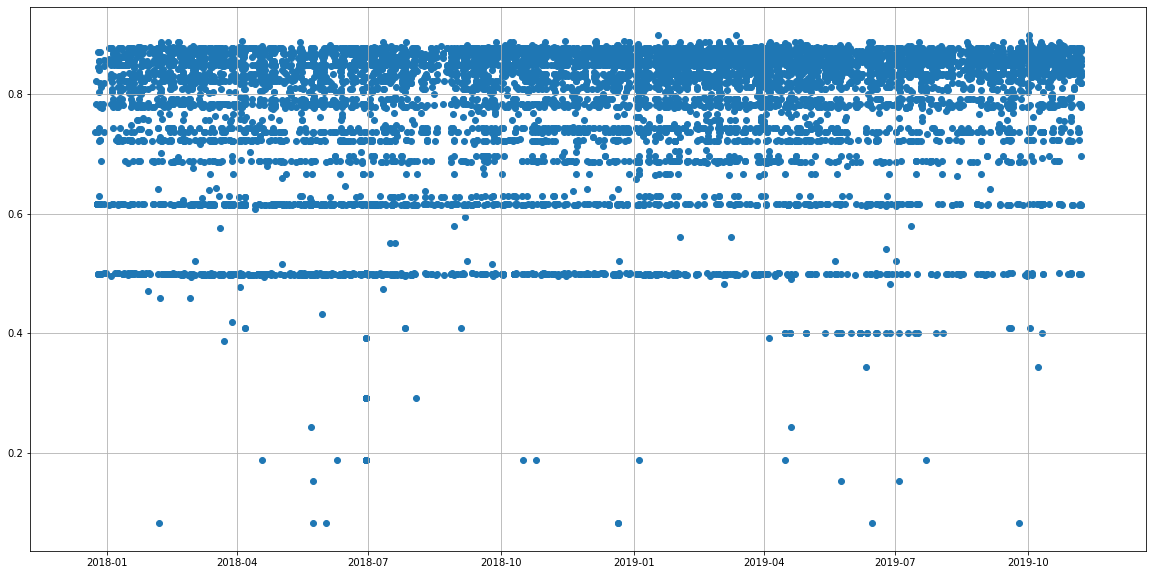

In [75]:
plt.figure(figsize=(20, 10))
plt.scatter(df['post'], df['rank'])
plt.grid()

### Here we see age distribution 

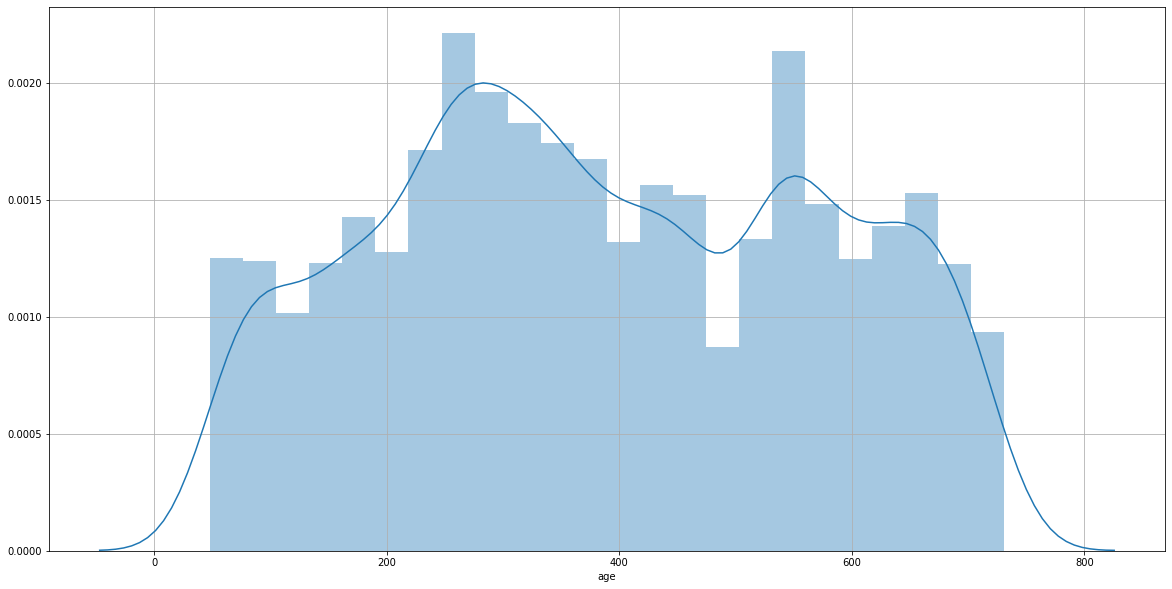

In [88]:
plt.figure(figsize=(20, 10))
sns.distplot(df['age']/(1000*3600*24))
plt.grid()

### Day analysis

In [38]:
# choosing the latest day in dataset
day1 = df.loc[df['post_date'] == datetime.date(2019, 11, 6)]

In [39]:
day1.head(5)

,posted_time,updated_time,age,updated_age,app_type,owner_type,owner_influence,number_of_likes,number_of_comments,reactivity,...,participant5_gender,participant5_is_employee,participant5_is_in_connections,participant5_focus,participant5_influence,rank,post,post_date,hour_of_day,day_of_week
post_date,,,,,,,,,,,,,,,,,,,,,
2019-11-06,18206.481481,1.573040e+12,48.244211,4.168300e+09,other,user,0.10000,11,4,0.0,...,female,1,0,marketing,0.99500,0.87150,2019-11-06 11:33:20,2019-11-06,11:33:20,3
2019-11-06,18206.481481,1.573040e+12,48.223495,4.166510e+09,wiki,space,0.99973,2,1,1.0,...,male,0,1,marketing,0.23077,0.81791,2019-11-06 11:33:20,2019-11-06,11:33:20,3
2019-11-06,18206.597222,1.573050e+12,48.049568,4.151483e+09,other,user,0.79592,3,0,0.0,...,male,0,1,marketing,0.23077,0.78110,2019-11-06 14:20:00,2019-11-06,14:20:00,3
2019-11-06,18206.481481,1.573040e+12,48.263007,4.169924e+09,other,user,0.10000,19,9,0.0,...,male,1,1,other,0.99689,0.87629,2019-11-06 11:33:20,2019-11-06,11:33:20,3
2019-11-06,18206.712963,1.573060e+12,48.045151,4.150801e+09,other,space,0.99973,12,0,1.0,...,male,1,1,marketing,0.99902,0.84820,2019-11-06 17:06:40,2019-11-06,17:06:40,3


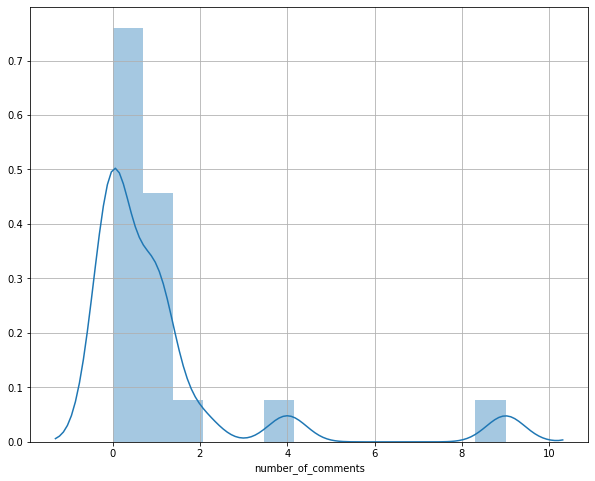

In [34]:
plt.figure(figsize=(10, 8))
sns.distplot(day1['number_of_comments'])
plt.grid()

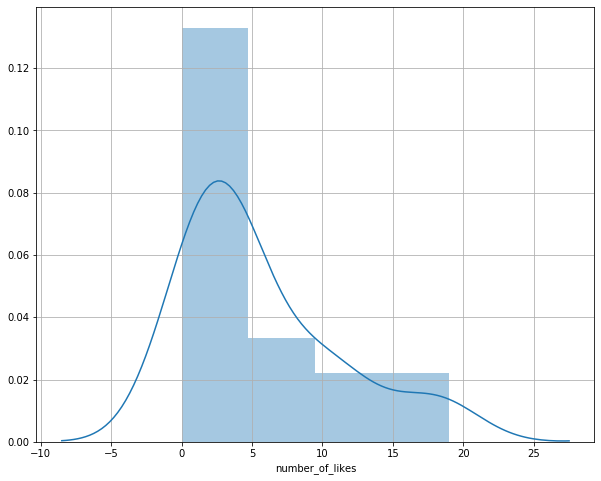

In [35]:
plt.figure(figsize=(10, 8))
sns.distplot(day1['number_of_likes'])
plt.grid()

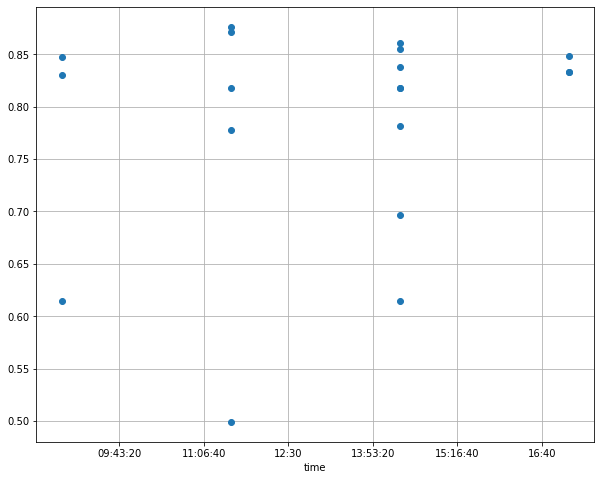

In [41]:
plt.figure(figsize = (10,8))
plt.plot_date(day1['hour_of_day'], day1['rank'])
plt.grid()
plt.show()

### Analyzing numerical features in day1 (last day in dataset)

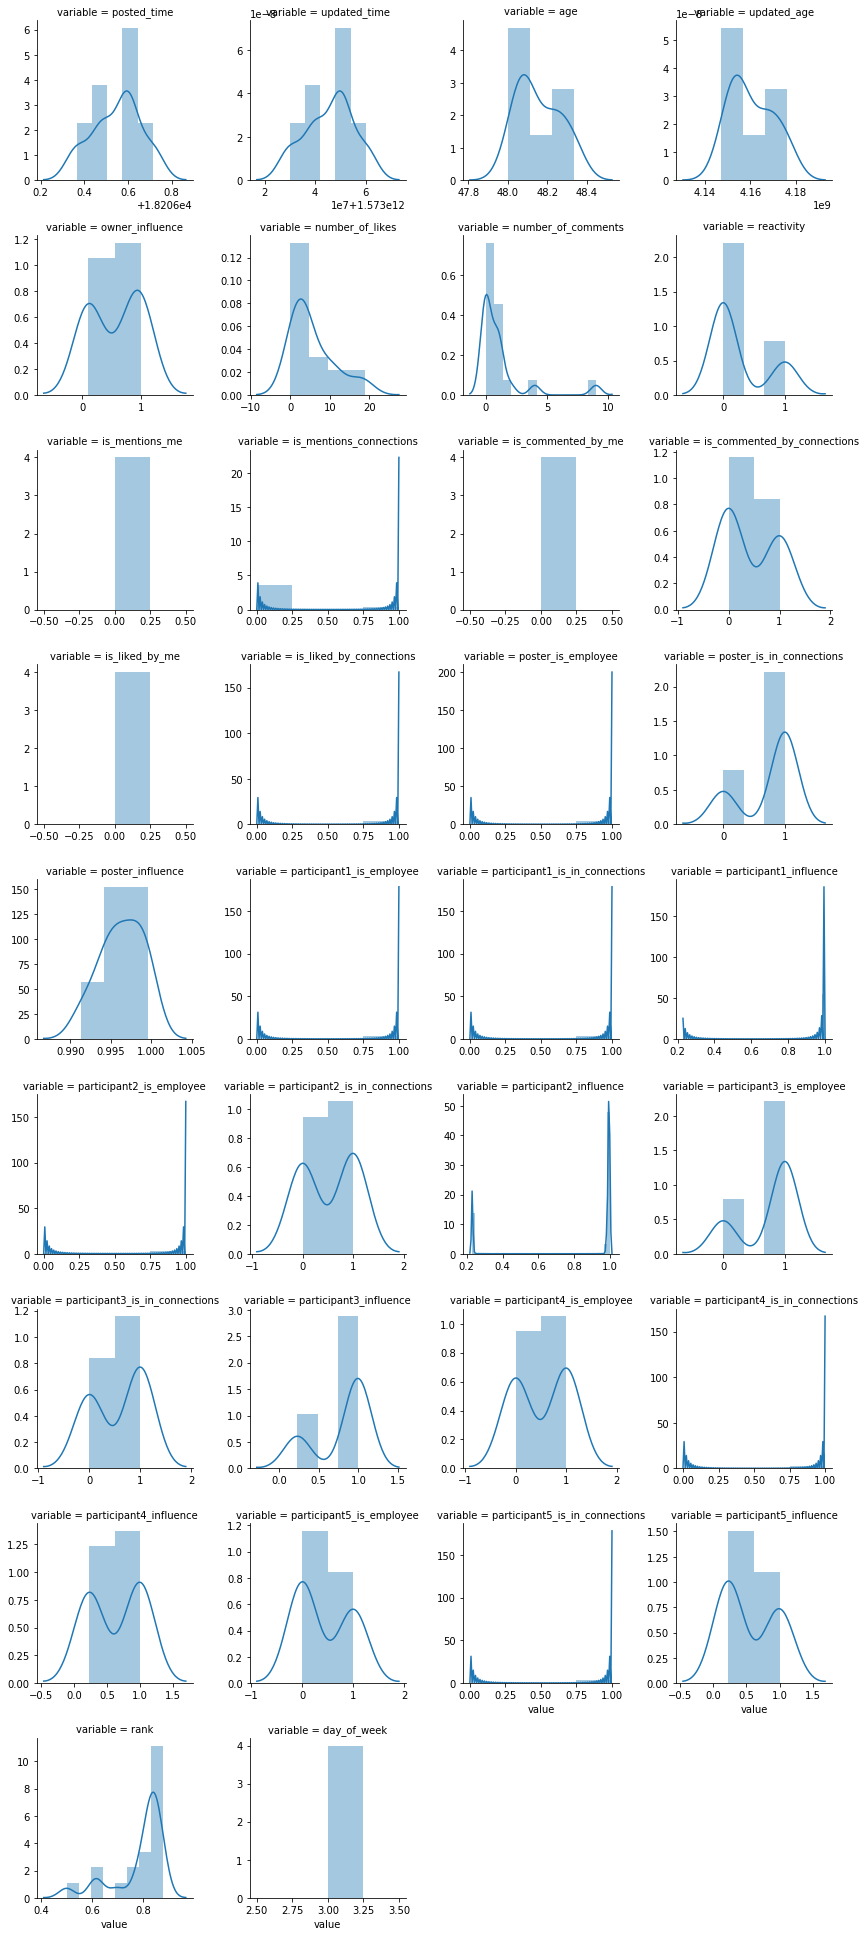

In [40]:
num_day1 = day1.select_dtypes(exclude=['object', 'datetime'])
nd = pd.melt(num_day1, value_vars = num_day1.columns)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Analyzing day2 numerical features  

In [42]:
day2 = df.loc[df['post_date'] == datetime.date(2019, 11, 1)]

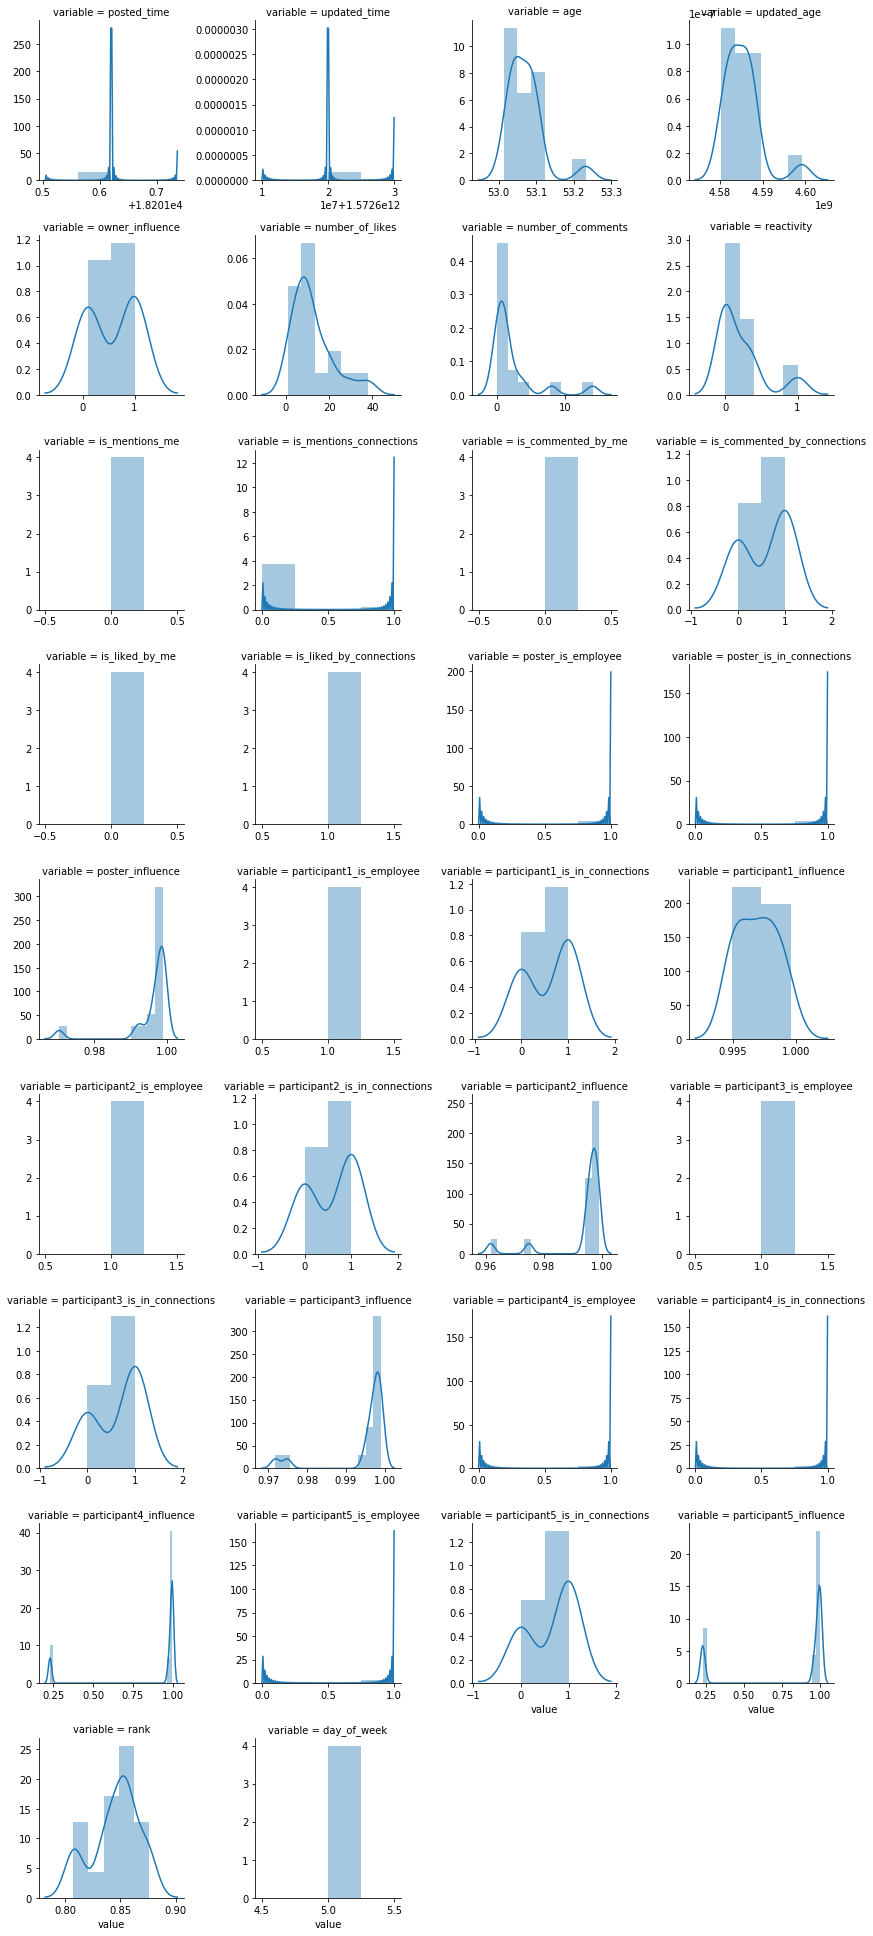

In [43]:
num_day2 = day2.select_dtypes(exclude=['object', 'datetime'])
nd = pd.melt(num_day2, value_vars = num_day2.columns)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

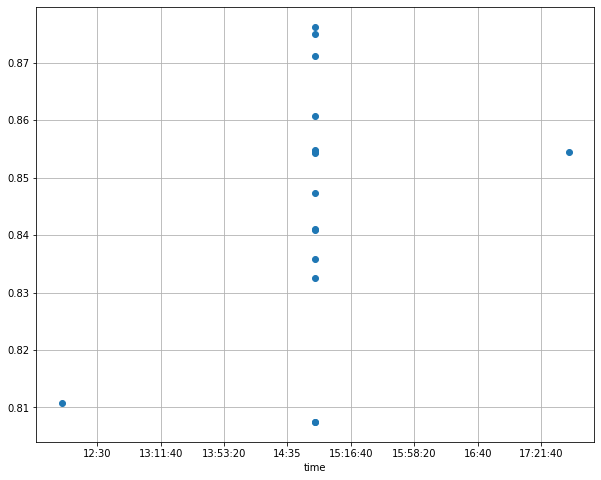

In [44]:
plt.figure(figsize = (10,8))
plt.plot_date(day2['hour_of_day'], day2['rank'])
plt.grid()
plt.show()

### Pearson correlation for day1 (fresh day)

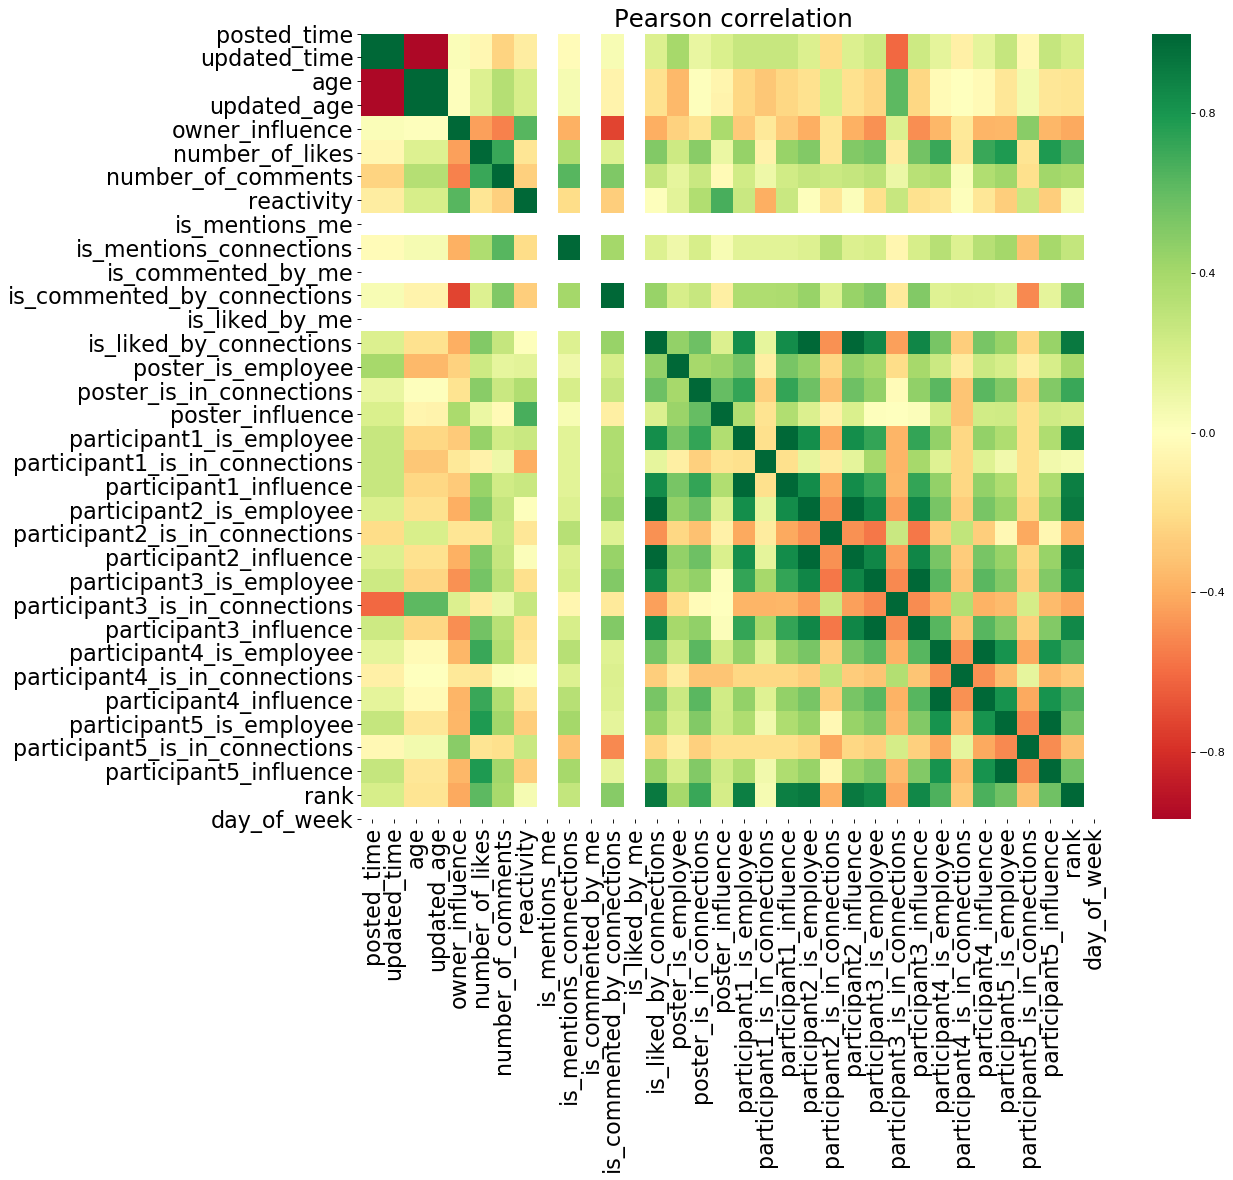

In [70]:
# Person correlation map
plt.figure(figsize=(15, 13), dpi= 80)
pearson1 = num_day1.corr(method = 'pearson')
sns.heatmap(pearson1, xticklabels=num_day1.corr().columns, yticklabels=num_day1.corr().columns, cmap='RdYlGn', center=0)
plt.title('Pearson correlation', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Pearson correlation for day2 (week older)

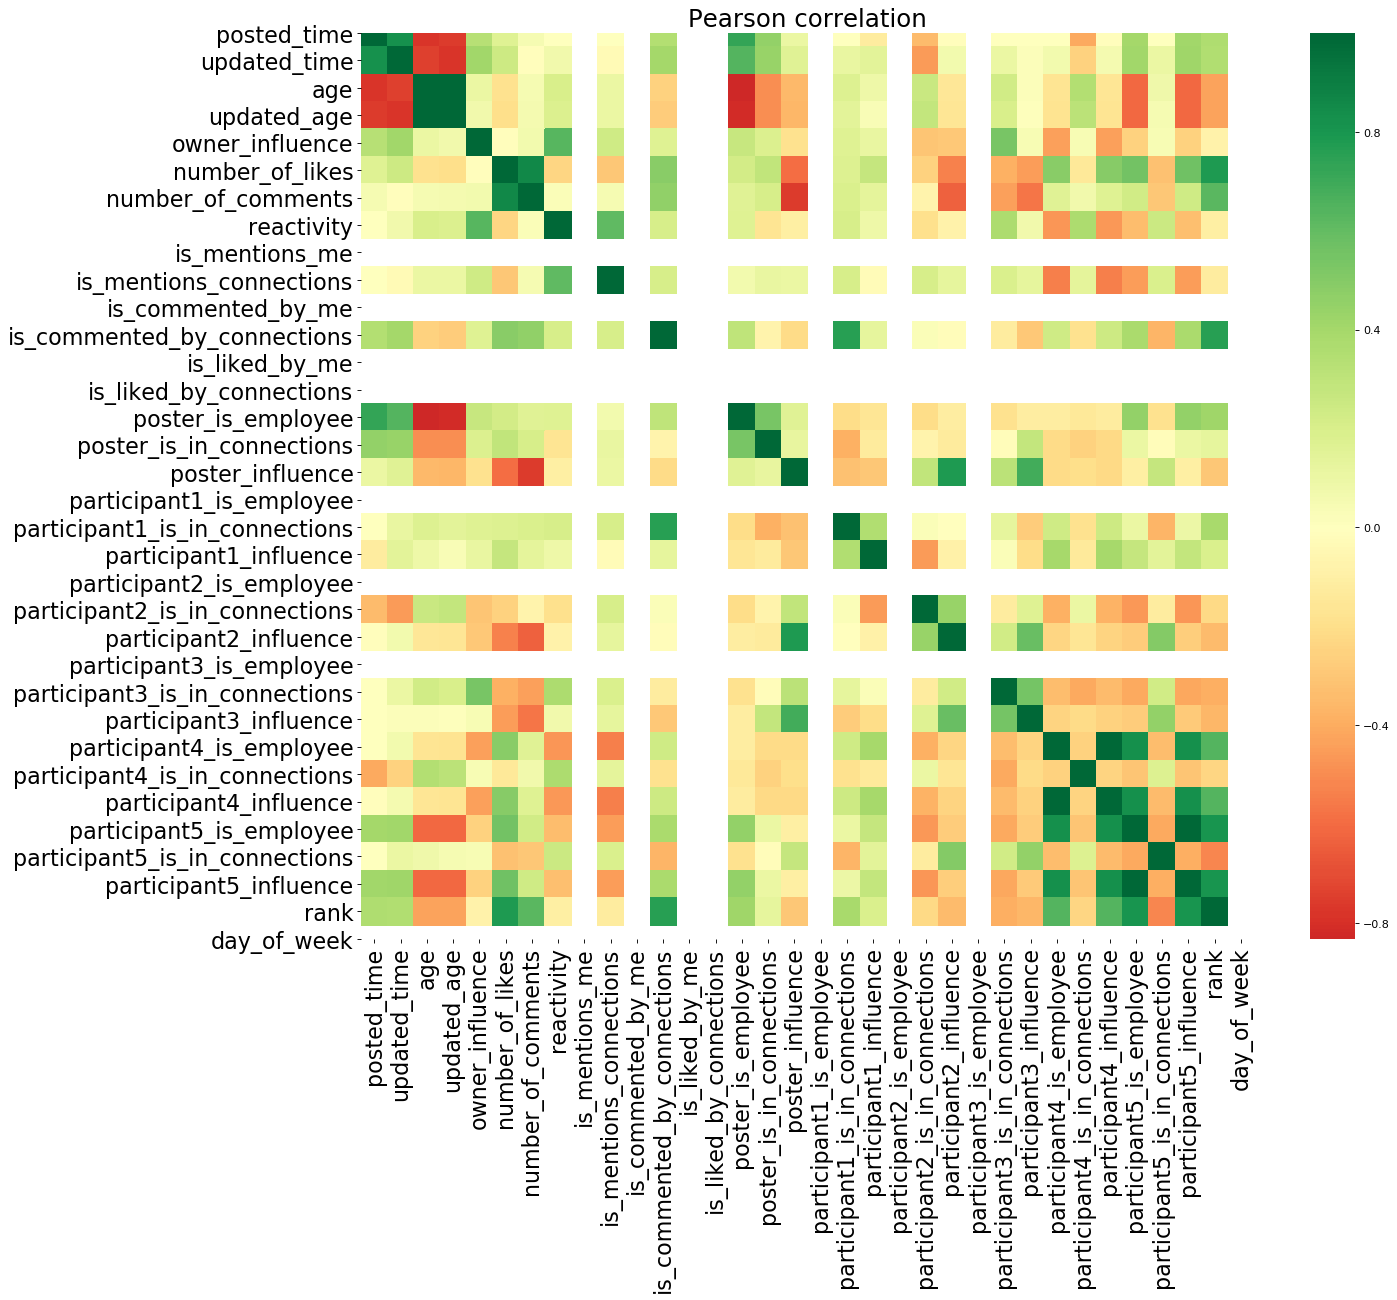

In [65]:
# Person correlation map
plt.figure(figsize=(18,15), dpi= 80)
pearson2 = num_day2.corr(method = 'pearson')
sns.heatmap(pearson2, xticklabels=num_day2.corr().columns, yticklabels=num_day2.corr().columns, cmap='RdYlGn', center=0)
plt.title('Pearson correlation', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [45]:
# analyzing all categorical variable using boxplots
cat_day1 = [c for c in day1.columns if day1[c].dtypes == 'object']
cat_day2 = [c for c in day2.columns if day2[c].dtypes == 'object']

In [46]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x = x, y = y)
    x = plt.xticks(rotation=90)

### Analyzing day1 categorical

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


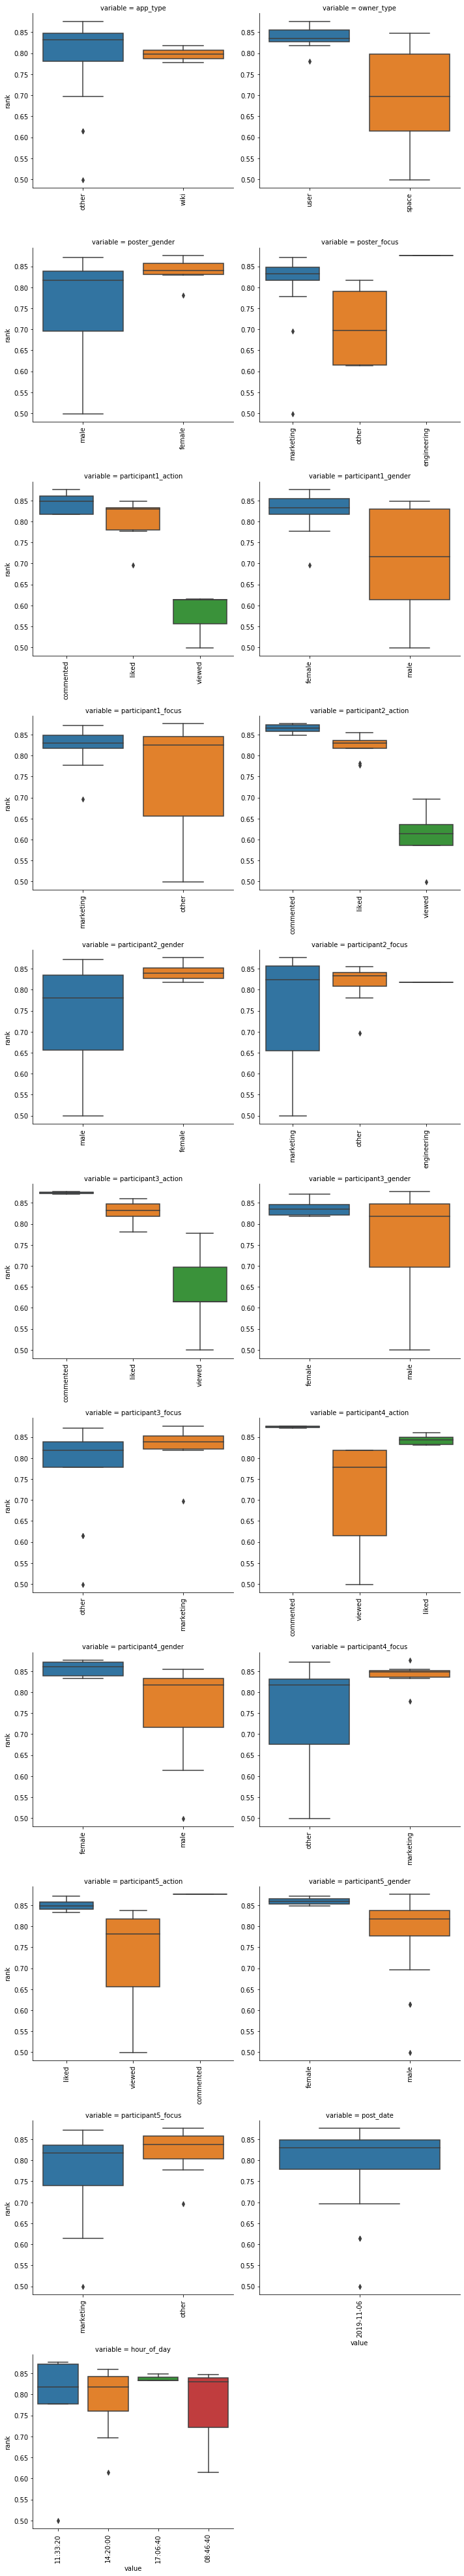

In [47]:
pivot = pd.melt(day1, id_vars='rank', value_vars = cat_day1)
grid = sns.FacetGrid(pivot, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
grid = grid.map(boxplot, 'value', 'rank')
grid

### Analyzing day2 categorical

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


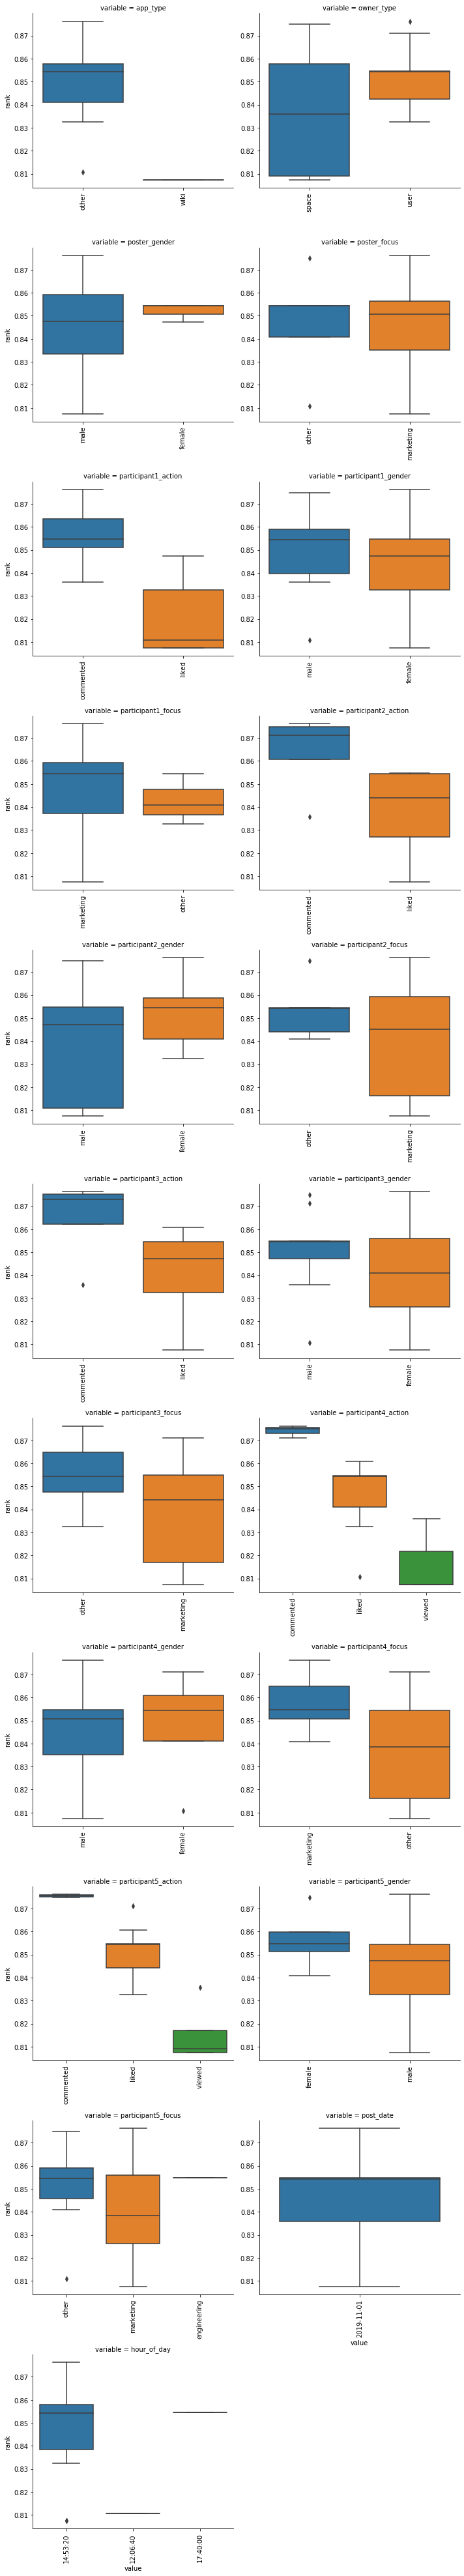

In [48]:
pivot = pd.melt(day2, id_vars='rank', value_vars = cat_day2)
grid = sns.FacetGrid(pivot, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
grid = grid.map(boxplot, 'value', 'rank')
grid

## Getting fresher day 5-12-2019 from test dataset

In [50]:
day3 = test.loc[test['post_date'] == datetime.date(2019, 12, 5)]

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


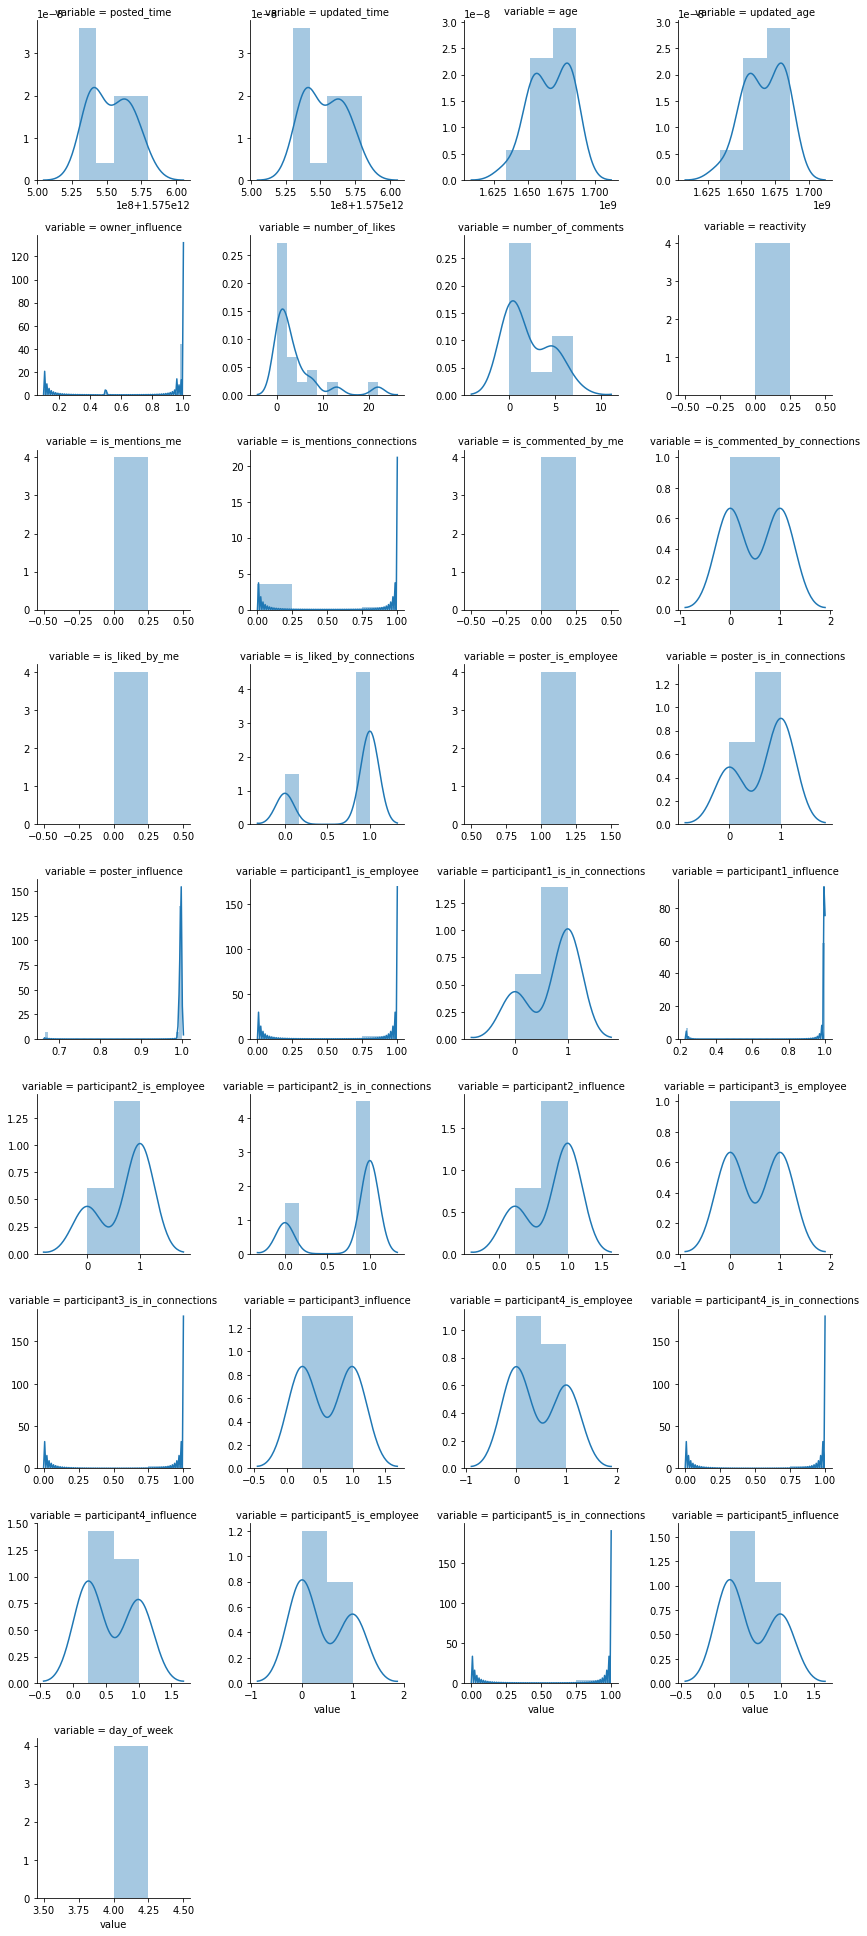

In [51]:
num_day3 = day3.select_dtypes(exclude=['object', 'datetime'])
nd = pd.melt(num_day3, value_vars = num_day3.columns)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

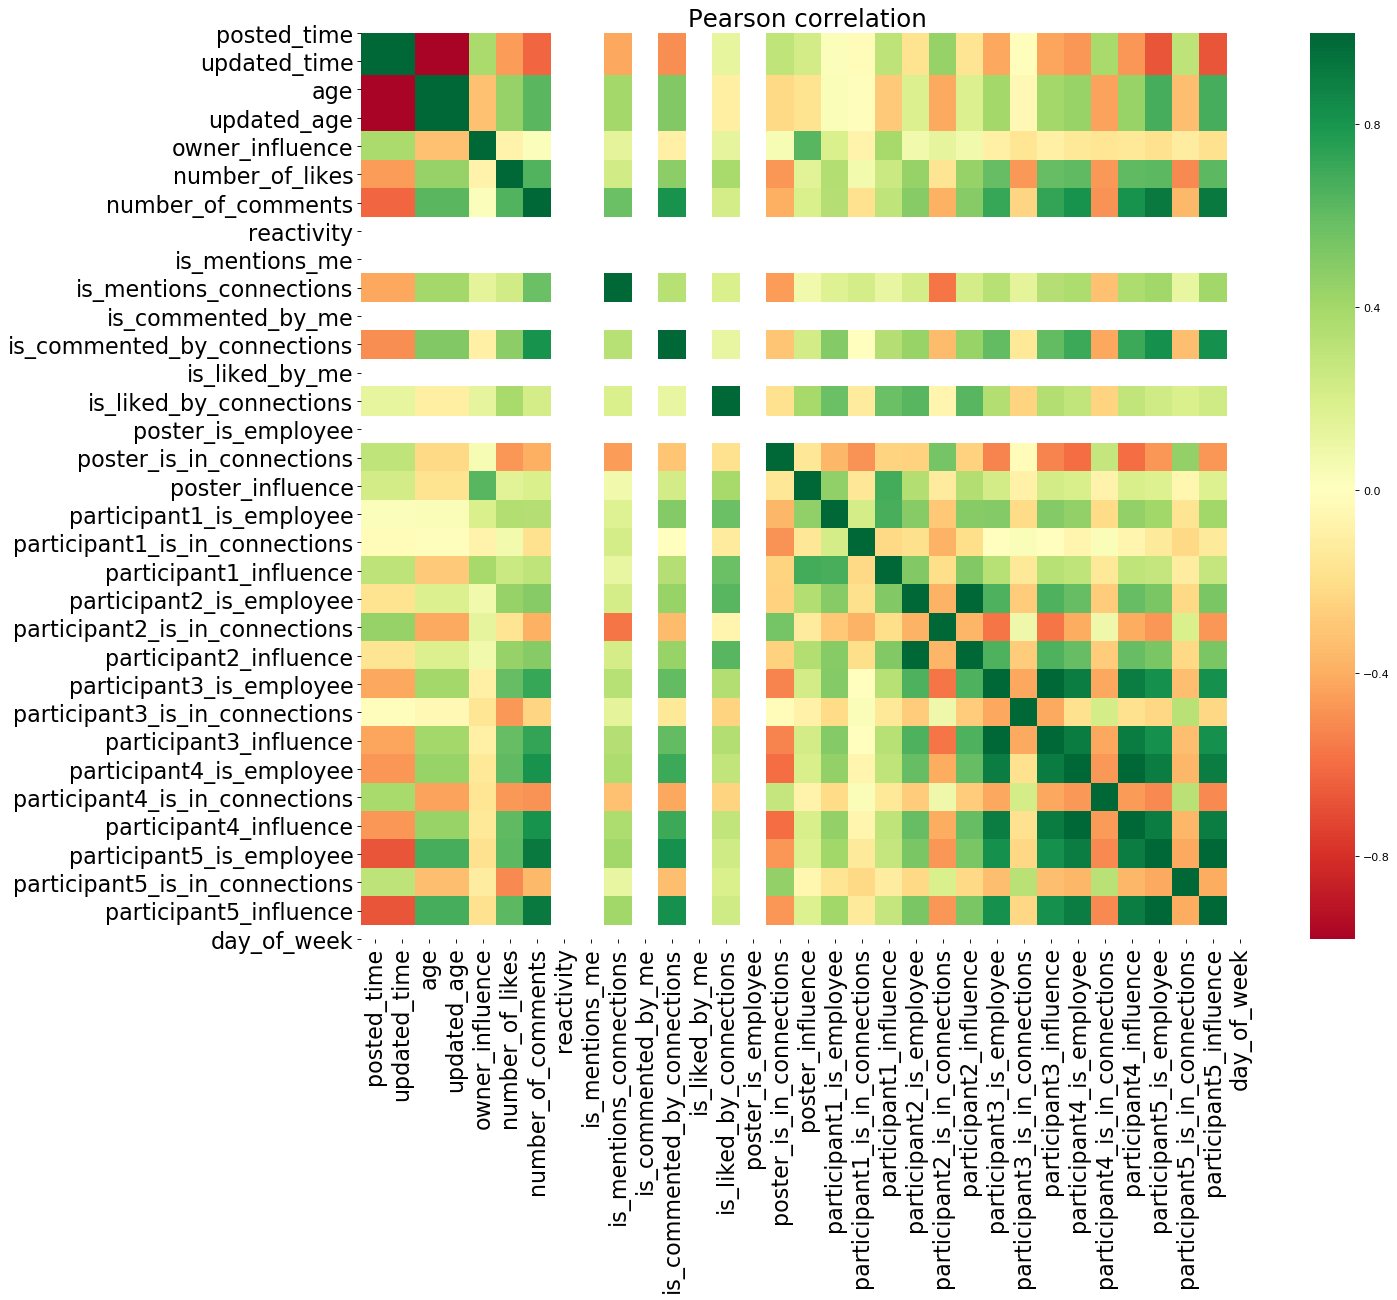

In [66]:
# Person correlation map
plt.figure(figsize=(18,15), dpi= 80)
pearson3 = num_day3.corr(method = 'pearson')
sns.heatmap(pearson3, xticklabels=num_day3.corr().columns, yticklabels=num_day3.corr().columns, cmap='RdYlGn', center=0)
plt.title('Pearson correlation', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

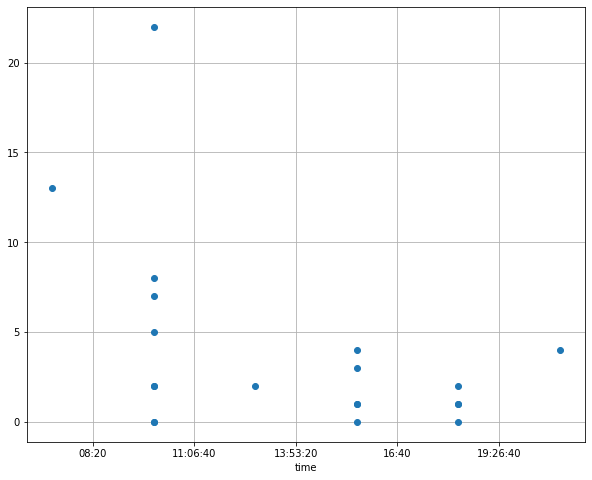

In [59]:
plt.figure(figsize = (10,8))
plt.plot_date(day3['hour_of_day'], day3['number_of_likes'])
plt.grid()
plt.show()

In [60]:
day3

,posted_time,updated_time,age,updated_age,app_type,owner_type,owner_influence,number_of_likes,number_of_comments,reactivity,...,participant5_action,participant5_gender,participant5_is_employee,participant5_is_in_connections,participant5_focus,participant5_influence,post,post_date,hour_of_day,day_of_week
0,1.575530e+12,1.575530e+12,1.686167e+09,1.686167e+09,other,space,0.99973,13,7,0,...,commented,male,1,1,marketing,0.99886,2019-12-05 07:13:20,2019-12-05,07:13:20,4
1,1.575580e+12,1.575580e+12,1.634145e+09,1.634145e+09,other,space,0.99992,4,0,0,...,viewed,male,0,1,other,0.23077,2019-12-05 21:06:40,2019-12-05,21:06:40,4
2,1.575540e+12,1.575540e+12,1.681664e+09,1.681664e+09,other,space,0.99973,2,5,0,...,commented,male,1,1,marketing,0.99886,2019-12-05 10:00:00,2019-12-05,10:00:00,4
4,1.575560e+12,1.575560e+12,1.661083e+09,1.661083e+09,other,space,0.99973,4,5,0,...,commented,male,1,1,marketing,0.99867,2019-12-05 15:33:20,2019-12-05,15:33:20,4
7,1.575570e+12,1.575570e+12,1.651162e+09,1.651162e+09,forum,space,0.99977,0,1,0,...,viewed,male,0,1,other,0.23077,2019-12-05 18:20:00,2019-12-05,18:20:00,4
9,1.575560e+12,1.575560e+12,1.657971e+09,1.657971e+09,other,space,0.99973,0,1,0,...,viewed,male,0,1,other,0.23077,2019-12-05 15:33:20,2019-12-05,15:33:20,4
10,1.575570e+12,1.575570e+12,1.653137e+09,1.653137e+09,wiki,space,0.99882,1,0,0,...,viewed,male,0,1,other,0.23077,2019-12-05 18:20:00,2019-12-05,18:20:00,4
11,1.575570e+12,1.575570e+12,1.653254e+09,1.653254e+09,wiki,space,0.99882,1,1,0,...,viewed,male,0,1,other,0.23077,2019-12-05 18:20:00,2019-12-05,18:20:00,4
12,1.575570e+12,1.575570e+12,1.653197e+09,1.653197e+09,wiki,space,0.99882,2,0,0,...,viewed,male,0,1,other,0.23077,2019-12-05 18:20:00,2019-12-05,18:20:00,4
13,1.575560e+12,1.575560e+12,1.654973e+09,1.654973e+09,forum,space,0.99977,1,1,0,...,viewed,male,0,1,other,0.23077,2019-12-05 15:33:20,2019-12-05,15:33:20,4


### Analyzing one week behaviour

In [61]:
# selecting just one recent week
start_date = pd.to_datetime('2019-10-28').date()
end_date = pd.to_datetime('2019-11-03').date()
week = df.loc[start_date : end_date]

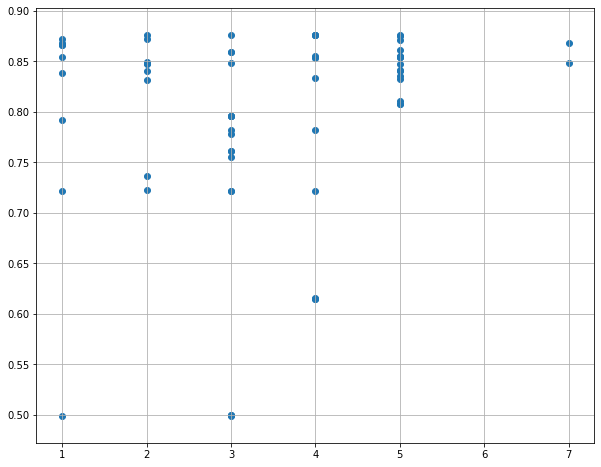

In [62]:
plt.figure(figsize = (10,8))
plt.scatter(week['day_of_week'], week['rank'])
plt.grid()
plt.show()

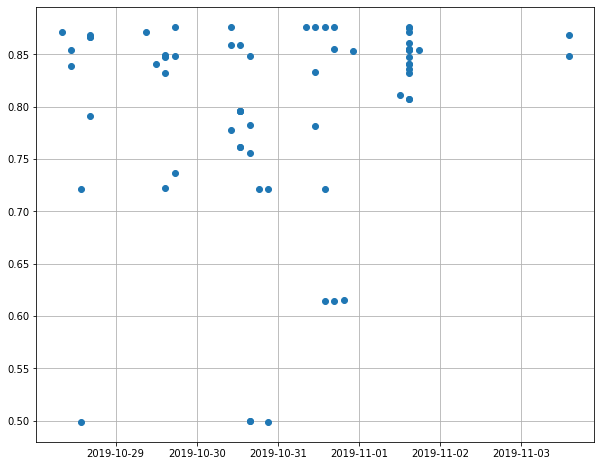

In [63]:
plt.figure(figsize = (10,8))
plt.plot_date(week['post'], week['rank'])
plt.grid()
plt.show()

## Skewness

In [52]:
# drop datetime column for error fixing
num.drop('post', axis=1, inplace=True)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
# skewness for numerical features
from scipy.stats import skew
skewness = num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

is_mentions_me                    16.476476
is_commented_by_me                 7.778110
is_liked_by_me                     5.209375
number_of_comments                 4.900434
number_of_likes                    3.104552
is_mentions_connections            1.830201
participant5_id                    1.327745
participant4_id                    1.047579
participant1_id                    0.864829
participant5_is_employee           0.818884
participant2_id                    0.818384
reactivity                         0.816480
participant3_id                    0.787576
participant4_is_employee           0.514746
participant5_influence             0.405856
poster_id                          0.305244
participant3_is_employee           0.171653
owner_id                           0.165818
day_of_week                        0.114627
updated_age                        0.078761
id                                 0.068244
participant4_influence             0.057403
age                             

In [54]:
skewed_cols = list(skewness[abs(skewness) > 1].index)
skewed_cols

['owner_influence',
 'number_of_likes',
 'number_of_comments',
 'is_mentions_me',
 'is_mentions_connections',
 'is_commented_by_me',
 'is_liked_by_me',
 'poster_is_in_connections',
 'poster_influence',
 'participant1_is_in_connections',
 'participant1_influence',
 'participant2_is_in_connections',
 'participant3_is_in_connections',
 'participant4_id',
 'participant4_is_in_connections',
 'participant5_id',
 'participant5_is_in_connections',
 'rank']

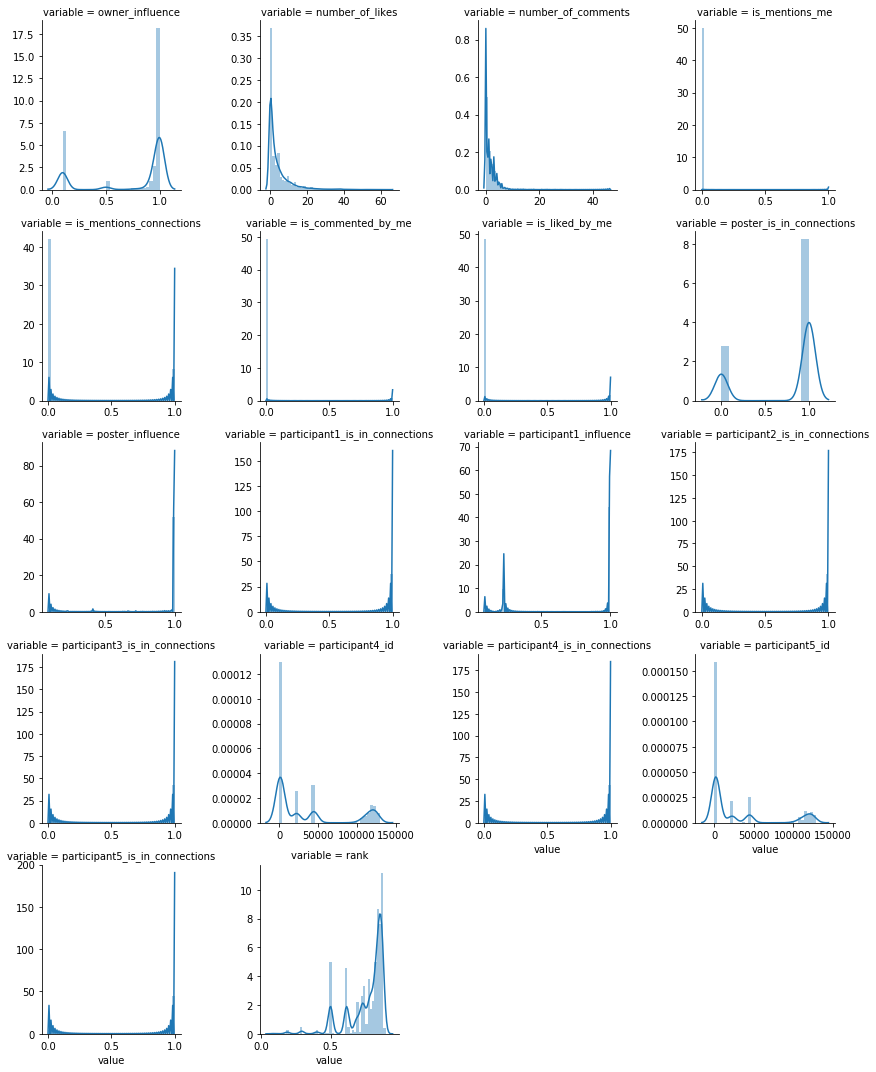

In [55]:
nd = pd.melt(num, value_vars = skewed_cols)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [95]:
train.poster_influence.describe()

count    9418.000000
mean        0.965250
std         0.151862
min         0.090910
25%         0.995860
50%         0.998060
75%         0.998950
max         0.999620
Name: poster_influence, dtype: float64

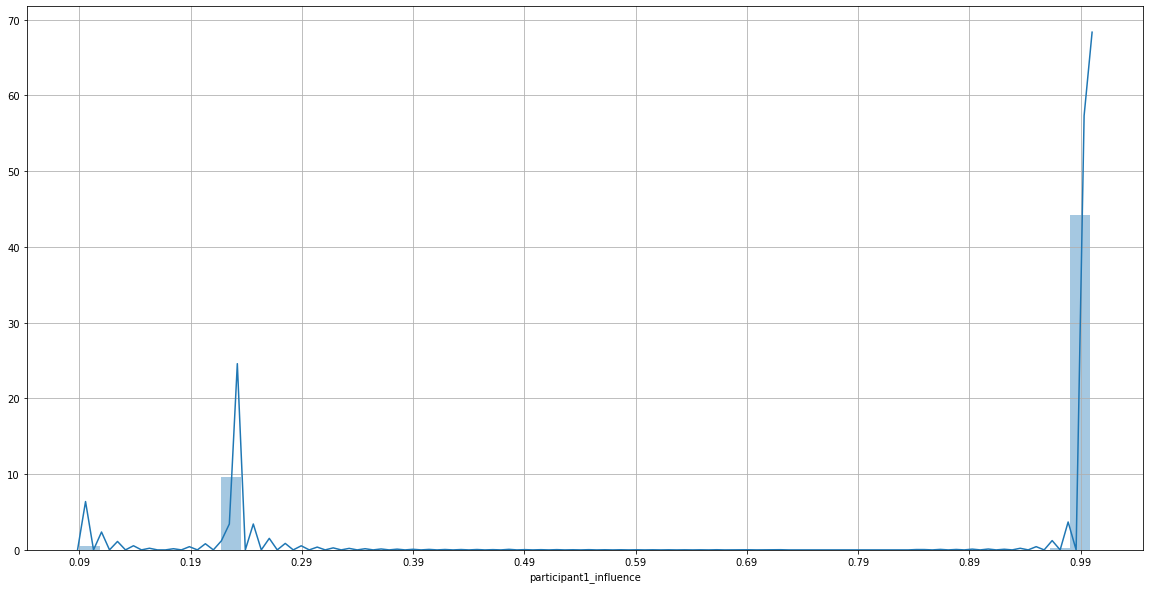

In [84]:
x = two_year_df['participant1_influence']
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(min(x), max(x)+1, 0.1))
sns.distplot(x)
plt.grid()

In [85]:
df.participant1_influence.describe()

count    9332.000000
mean        0.853552
std         0.300695
min         0.090910
25%         0.994500
50%         0.997560
75%         0.998860
max         0.999620
Name: participant1_influence, dtype: float64

In [86]:
df.participant1_influence.unique()

array([0.99899, 0.99756, 0.23077, 0.9963 , 0.99715, 0.96403, 0.99674,
       0.99896, 0.99919, 0.99787, 0.99762, 0.99436, 0.99811, 0.99015,
       0.9945 , 0.99902, 0.99825, 0.99962, 0.99866, 0.99693, 0.99645,
       0.99895, 0.99861, 0.99809, 0.99867, 0.99886, 0.99828, 0.99611,
       0.99322, 0.99813, 0.09091, 0.99772, 0.99891, 0.99808, 0.97015,
       0.84615, 0.47368, 0.99473, 0.99339, 0.99586, 0.89247, 0.99034,
       0.99589, 0.96528, 0.99198, 0.99788, 0.95327, 0.99806, 0.99027,
       0.99351, 0.99507, 0.97442, 0.52381, 0.54545, 0.98501, 0.99904,
       0.81481, 0.77273, 0.9961 , 0.99332, 0.99453, 0.6875 , 0.9927 ,
       0.69697, 0.99248, 0.72222, 0.99186, 0.90566, 0.99709, 0.99876,
       0.44444, 0.94253, 0.98246, 0.99684, 0.98955, 0.98028, 0.98775,
       0.99433, 0.99649, 0.99613, 0.86301, 0.9971 , 0.9948 , 0.97691,
       0.99337, 0.99689, 0.99842, 0.99301, 0.99471, 0.87654, 0.99583,
       0.99552, 0.99678, 0.99489, 0.89362, 0.99754, 0.98969, 0.99402,
       0.89691, 0.99

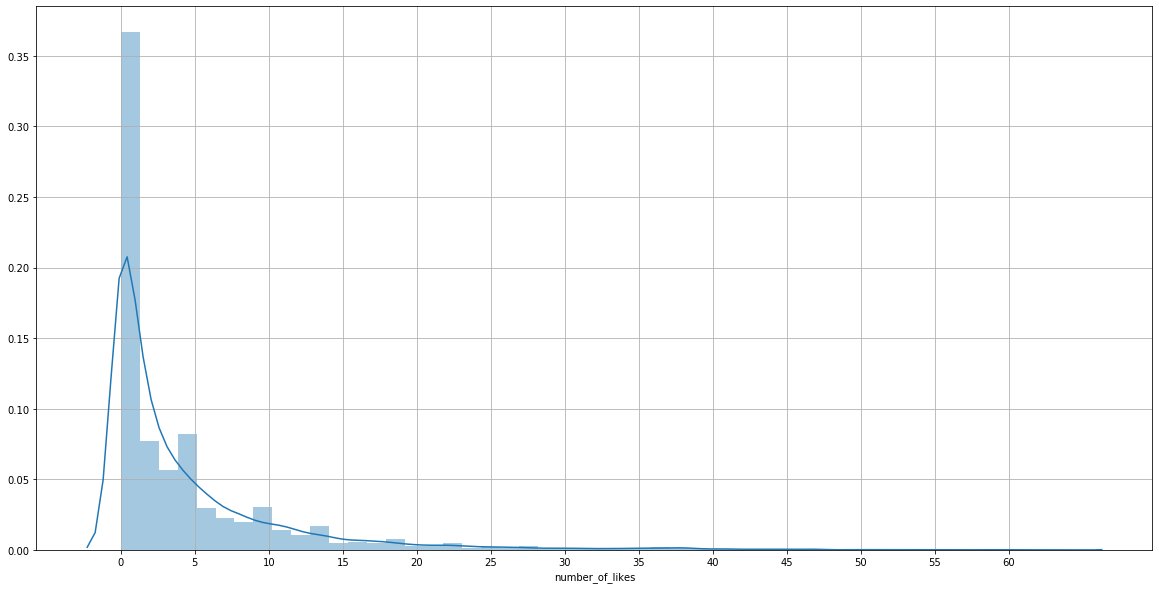

In [78]:
x = two_year_df['number_of_likes']
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(min(x), max(x)+1, 5))
sns.distplot(x)
plt.grid()

In [79]:
df.number_of_likes.describe()

count    9332.000000
mean        4.403772
std         6.964603
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        64.000000
Name: number_of_likes, dtype: float64

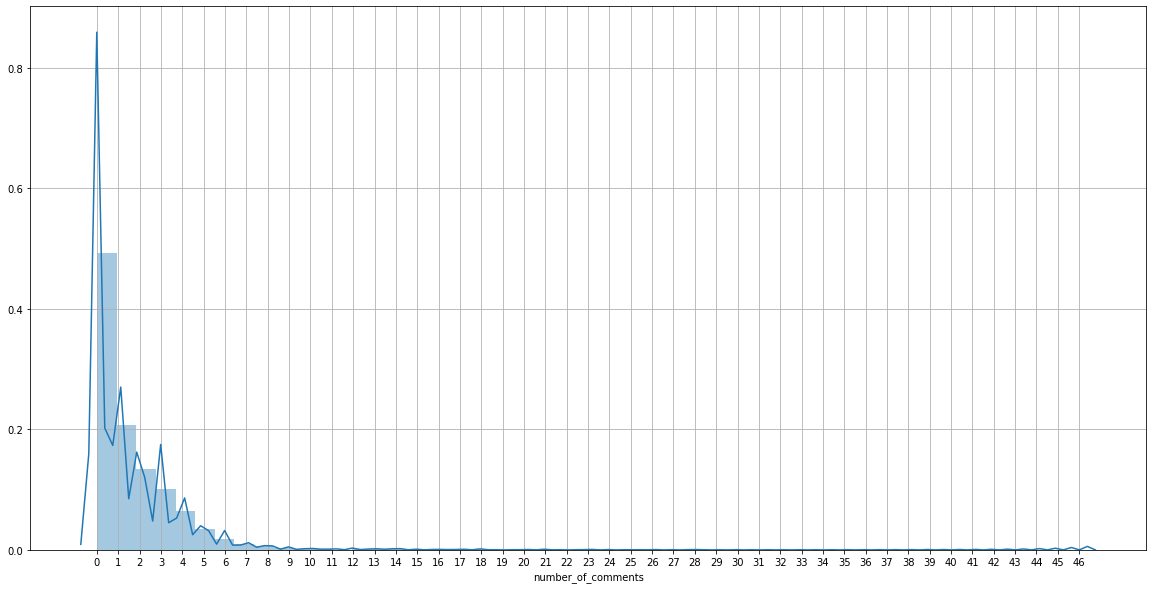

In [82]:
x = two_year_df['number_of_comments']
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(min(x), max(x)+1, 1))
sns.distplot(x)
plt.grid()

In [83]:
df.number_of_comments.describe()

count    9332.000000
mean        1.573939
std         2.601986
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: number_of_comments, dtype: float64